In [1]:
from helper_funcs_ConnectomeCompare import get_Caronlike, plot_ACP, alignConnectomes, run_PCA, subspace_angles, shufmat, subspace_angles_pair

In [2]:
# Get all the weight matrices
W_Neuprint, W_Neuprint_thr, W_OGCaron, W_Caron2013, W_Mel_Male, W_Mel_Female, W_Sec_Female, W_Sim_Female, W_FAFB_thr, cin_val, c, OGCaron = alignConnectomes()

loading from file
processing connections
generating weight matrices
done
found 110 of 134 uPN IDs upstream of KCs
there are 50 neuprint glomeruli
['D', 'DA1', 'DA2', 'DA3', 'DA4l', 'DA4m', 'DC1', 'DC2', 'DC3', 'DC4', 'DL1', 'DL2d', 'DL2v', 'DL3', 'DL4', 'DL5', 'DM1', 'DM2', 'DM3', 'DM4', 'DM5', 'DM6', 'DP1l', 'DP1m', 'V', 'VA1d', 'VA1v', 'VA2', 'VA3', 'VA4', 'VA5', 'VA6', 'VA7l', 'VA7m', 'VC1', 'VC2', 'VC3L+VC3M', 'VC4', 'VL1', 'VL2a', 'VL2p', 'VM1', 'VM2', 'VM3', 'VM4', 'VM5d', 'VM5v', 'VM7d', 'VM7v', 'VP1m']
there are 50 caron glomeruli
['D', 'DA1', 'DA2', 'DA3', 'DA4l', 'DA4m', 'DC1', 'DC2', 'DC3', 'DC4', 'DL1', 'DL2d', 'DL2v', 'DL3', 'DL4', 'DL5', 'DM1', 'DM2', 'DM3', 'DM4', 'DM5', 'DM6', 'DP1l', 'DP1m', 'V', 'VA1d', 'VA1v', 'VA2', 'VA3', 'VA4', 'VA5', 'VA6', 'VA7l', 'VA7m', 'VC1', 'VC2', 'VC3L+VC3M', 'VC4', 'VL1', 'VL2a', 'VL2p', 'VM1', 'VM2', 'VM3', 'VM4', 'VM5d', 'VM5v', 'VM7d', 'VM7v', 'VP1m']
there are 50 fafb glomeruli
['D', 'DA1', 'DA2', 'DA3', 'DA4l', 'DA4m', 'DC1', 'DC2', 

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Conditional input analysis
W = W_Sec_Female

ngloms = len(W.columns)
mat = np.ndarray(shape=(ngloms, ngloms))

# 1. Select all KCs having at least one claw receiving input from a bouton of Glom A
for i in range(len(W.columns)):
    glom = W.columns[i]
    kc_selects = W[glom][W[glom] == 1].index
    # 2. The number of inputs to these KCs from Glom B, C, D, and so on are counted
    for j in range(len(W.columns)):
        glom2 = W.columns[j]
        mat[i, j] = W[glom2][kc_selects].sum()


# 4. For each null model, repeat above process on 1,000 random shuffles 
num_reps = 1000
rand_mats = []

for rep in range(num_reps):
    Wcopy = np.copy(W)
    Wrand = shufmat(Wcopy)
    Wrand = pd.DataFrame(Wrand)
    Wrand.columns = W.columns
    matr = np.ndarray(shape=(ngloms, ngloms))

    # 1. Select all KCs having at least one claw receiving input from a bouton of Glom A
    for i in range(len(Wrand.columns)):
        glom = Wrand.columns[i]
        kc_selects = Wrand[glom][Wrand[glom] == 1].index
        # 2. The number of inputs to these KCs from Glom B, C, D, and so on are counted
        for j in range(len(Wrand.columns)):
            glom2 = Wrand.columns[j]
            matr[i, j] = Wrand[glom2][kc_selects].sum()
    
    rand_mats.append(matr)
    
    



    

In [226]:
# Matrix of z-scores
sd = np.nanstd(rand_mats, axis=0)
sd = np.where(sd == 0, 0.00000001, sd)
avg = np.nanmean(rand_mats, axis=0)

comm_zscore = np.divide(np.subtract(mat, avg), sd)

In [227]:
# Kmeans clustering
from sklearn.cluster import KMeans
def km_cluster(m):
    m[np.isnan(m)] = 0
    fi = KMeans(n_clusters=4).fit(m)
    print(fi.labels_)
    return np.argsort(fi.labels_)

reorder_idx = km_cluster(comm_zscore)

[3 2 2 2 3 3 0 2 2 3 2 2 1 1 2 3 2 2 1 3 2 2 2 3 2 2 0 1 1 2 1 2 1 1 1 1 2
 2 3 1 2 1 2 2 2 2 2 2 2 1]


In [228]:
reorder_idx

array([26,  6, 28, 30, 32, 18, 33, 34, 35, 13, 27, 49, 39, 41, 12, 40, 36,
       42, 43, 44, 45, 31, 46, 29, 47, 37, 24, 48,  1, 22, 21, 20,  2, 17,
       16,  3, 14, 11, 25, 10,  8,  7,  4, 38,  9, 15, 19, 23,  5,  0],
      dtype=int64)

In [229]:
comm_zscore = comm_zscore[np.ix_(reorder_idx, reorder_idx)]

In [230]:
reorder_gloms = [W.columns[i] for i in reorder_idx]

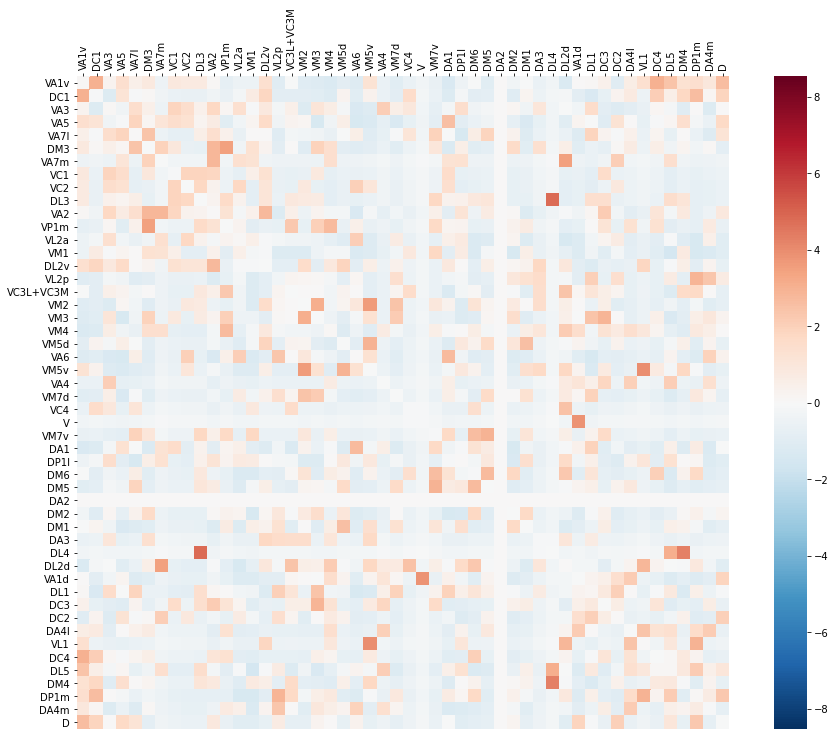

In [232]:
import seaborn as sns
# plotting z score matrix
fig, ax1 = plt.subplots()
sns.heatmap(comm_zscore, xticklabels=reorder_gloms, yticklabels=reorder_gloms, ax=ax1, vmin=-8.53, vmax=8.53, cmap="RdBu_r")

ax1.tick_params(bottom=False,labeltop=True, top=True, labelbottom=False)
ax1.tick_params(axis='x',labelrotation=90)

#col_list = t1.col_ids
#col_colors = df_lookup('short_glom_name', gloms, 'color', tbl)

#for x in [ax1.get_xticklabels(), ax1.get_yticklabels()]:
#    for idx, tick in enumerate(x):
#        tick.set_color(col_colors[idx])
#        if col_list[idx] in comm_ids:
#            tick.set_weight("extra bold")

ax1.set_aspect("equal")
fig.set_size_inches(16,12)
plt.show()